In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)




In [3]:
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/test.csv')

In [4]:
print('training dataset dimensions: ', train.shape)
print('test dataset dimensions: ', test.shape, '\n')

training dataset dimensions:  (112799, 785)
test dataset dimensions:  (18799, 785) 



In [5]:
# update column names for both datasets
columns = ['labels']
for i in range(train.shape[1]-1):
    columns.append(i)
    
train.columns = columns
test.columns = columns

classes = train['labels'].unique()
print('number of classes: ', len(classes))

train.head()

number of classes:  47


,labels,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,36,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,43,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [6]:
from sklearn.model_selection import train_test_split

# split training and validation data using sklearn
x_train, x_val, y_train, y_val = train_test_split(train.drop(['labels'], axis=1),
                                                  train.labels - 1,
                                                  train_size=0.8,
                                                  test_size=0.2,
                                                  random_state=42)

# reshape and normalize test data
x_train = x_train / 255.0
x_val = x_val / 255.0

testX = test.values[:, 1:].reshape(test.shape[0],28, 28, 1).astype('float32')
x_test = testX / 255.0
y_test = test['labels'].values - 1 # this is just to make the neurons in the output layer start at 0

print('trianing set: ', x_train.shape, y_train.shape)
print('validation set: ', x_val.shape, y_val.shape)
print('test set: ', x_test.shape, y_test.shape)

trianing set:  (90239, 784) (90239,)
validation set:  (22560, 784) (22560,)
test set:  (18799, 28, 28, 1) (18799,)


In [26]:
from sklearn.model_selection import train_test_split

# split training and validation data using sklearn
x_train, x_val, y_train, y_val = train_test_split(train.drop(['labels'], axis=1),
                                                  train.labels,
                                                  train_size=0.8,
                                                  test_size=0.2,
                                                  random_state=42)

# reshape and normalize test data
x_train = x_train / 255.0
x_val = x_val / 255.0

testX = test.values[:, 1:].reshape(test.shape[0],28, 28, 1).astype('float32')
x_test = testX / 255.0
y_test = test['labels'].values  # this is just to make the neurons in the output layer start at 0

print('trianing set: ', x_train.shape, y_train.shape)
print('validation set: ', x_val.shape, y_val.shape)
print('test set: ', x_test.shape, y_test.shape)

trianing set:  (90239, 784) (90239,)
validation set:  (22560, 784) (22560,)
test set:  (18799, 28, 28, 1) (18799,)


In [17]:
import tensorflow as tf

# set accuracy
desired_accuracy = 0.90
    
# create callback to stop training when we reached desired accuracy
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') is not None and logs.get('accuracy') >= desired_accuracy):
            print('\nReached 90% training accuracy: cancelling training...')
            self.model.stop_training = True

# instantiate callback
callbacks = myCallback()
    

def train_model():
    # define model
    model = tf.keras.models.Sequential([
        # initial normalization
        tf.keras.layers.Reshape((28, 28, 1), input_shape=(784,)),
#         tf.keras.layers.BatchNormalization(),
        
        # first convolution
        tf.keras.layers.Conv2D(8, (3, 3), activation='relu'), # applies kernels to our data
        tf.keras.layers.MaxPooling2D(2, 2), # reduce dimension
#         tf.keras.layers.BatchNormalization(),
#         tf.keras.layers.Dropout(0.4),
        
        # second convolution
        tf.keras.layers.Conv2D(16, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
#         tf.keras.layers.BatchNormalization(),
#         tf.keras.layers.Dropout(0.4),
        
        # third convolution
        tf.keras.layers.Conv2D(24, (3, 3), activation='relu'),
#         tf.keras.layers.MaxPooling2D(2, 2),
#         tf.keras.layers.BatchNormalization(),
#         tf.keras.layers.Dropout(0.4),

    
        # feed to DNN
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
#         tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(len(classes), activation=tf.nn.softmax) # generalized logistic regression
    ])
    
    # use sparse categorical crossentropy since values are labeled from 0-25
    model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

In [18]:
# view model summary before running neural network
model = train_model()
model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_2 (Reshape)          (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 26, 26, 8)         80        
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 8)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 16)        1168      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 3, 3, 24)          3480      
_________________________________________________________________
flatten_2 (Flatten)          (None, 216)              

In [19]:
# train neural network and have it automatically stop on 94% accuracy
history = model.fit(x_train, y_train, epochs=1000,
                    validation_data=(x_val, y_val),
                    batch_size=4096, verbose=1,
                    callbacks=[callbacks])

Epoch 1/1000
23/23 [==============================] - 22s 936ms/step - loss: 3.6913 - accuracy: 0.1203 - val_loss: 3.2347 - val_accuracy: 0.2467
Epoch 2/1000
23/23 [==============================] - 21s 922ms/step - loss: 2.5173 - accuracy: 0.3637 - val_loss: 1.8982 - val_accuracy: 0.4688
Epoch 3/1000
23/23 [==============================] - 21s 919ms/step - loss: 1.6931 - accuracy: 0.5279 - val_loss: 1.5017 - val_accuracy: 0.5767
Epoch 4/1000
23/23 [==============================] - 21s 919ms/step - loss: 1.4110 - accuracy: 0.5996 - val_loss: 1.3189 - val_accuracy: 0.6167
Epoch 5/1000
23/23 [==============================] - 21s 919ms/step - loss: 1.2414 - accuracy: 0.6417 - val_loss: 1.1641 - val_accuracy: 0.6556
Epoch 6/1000
23/23 [==============================] - 21s 917ms/step - loss: 1.1087 - accuracy: 0.6737 - val_loss: 1.0384 - val_accuracy: 0.6872
Epoch 7/1000
23/23 [==============================] - 21s 915ms/step - loss: 0.9954 - accuracy: 0.7033 - val_loss: 0.9440 - val_ac

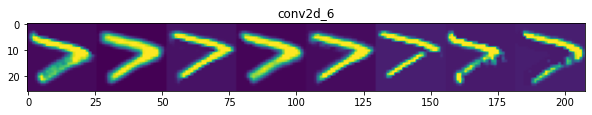

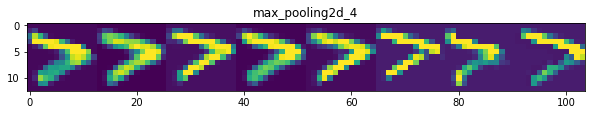

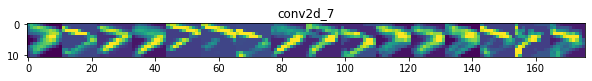

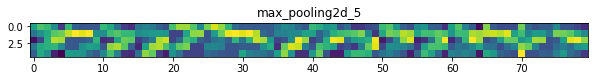

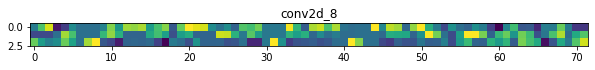

In [23]:
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import random
import matplotlib
import matplotlib.pyplot as plt


successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

number = random.sample(range(0, len(x_val)), 1)[0]

# Run the image through the network and return the intermediate representations for the data.
successive_feature_maps = visualization_model.predict(x_val.iloc[number, :].to_numpy().reshape(1, 784))

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers[1:]]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
    # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 10. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

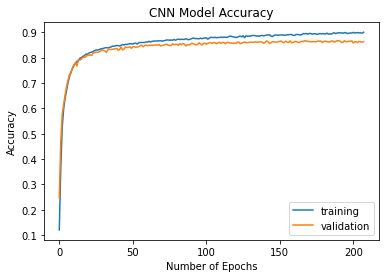

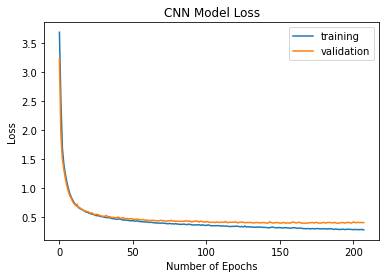

In [24]:
# Plot training vs validation accruacy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('CNN Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Number of Epochs')
plt.legend(['training', 'validation'], loc='lower right')
plt.show()

# Plot training vs validation losses
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('CNN Model Loss')
plt.ylabel('Loss')
plt.xlabel('Number of Epochs')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

In [27]:
evaluate = model.evaluate(x_test, y_test)

# predict values for all data
predictions = model.predict(x_test)
print("predictions shape:", predictions.shape)


588/588 [==============================] - 3s 5ms/step - loss: 0.4249 - accuracy: 0.8606
predictions shape: (18799, 47)


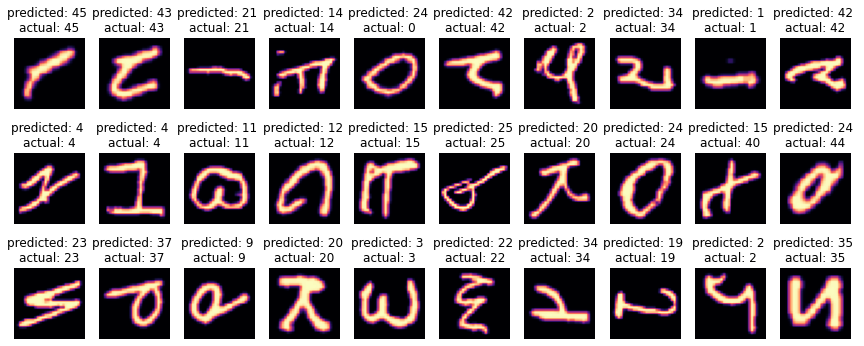

In [28]:
# select random data from test set and predict it's classification
test_samples = random.sample(range(0, len(x_test)), 30) # select 30 samples

# display results
plt.figure(figsize=(15, 6))
for i in test_samples:
    plt.subplot(3, 10, test_samples.index(i) + 1)  
    plt.imshow(x_test[i].reshape(28,28), cmap='magma')
    plt.title(f'predicted: {np.argmax(predictions[i])} \nactual: {y_test[i]}')
    plt.axis('off')

In [1]:
#For faster prepocessing we have indexed the imagesrather then manually labelling the 131598 images.
#Then the images  have different lable name then the image value.

In [ ]:
# I have took some of  the code for CNN from the public domain i.e. Kaggle and coded other parts myself 
#https://www.kaggle.com/yassineghouzam/introduction-to-cnn-keras-0-997-top-6